# Analiza oscylatorów sprzężonych na przykładzie opony i amortyzatora roweru górskiego

   Dobra amortyzacja pojazdów użytkowanych w trudnym terenie jest kluczowa dla zachowania względnego komfortu i bezpieczeństwa. W młodym sporcie olimpijskim, jakim jest Cross-country, zapotrzebowanie na coraz lepsze systemy amortyzacji stale wzrasta. Ich rozwój sięga samych początków kolarstwa, czyli roku 1817, kiedy niemiecki baron Karl Friedrich Drais von Sauerbronn odbył pierwszą przejażdżkę rowerem napędzanym odepchnięciami nóg od ziemi [1], w&nbsp;Polsce nazywanego drezyną. Rolę amortyzacji pełniło w niej ugięcie drewnianej konstrukcji i ewentualnego miękkiego siodła. Rozwiązanie to nie chroniło użytkownika przed większością wstrząsów.
   
   Dopiero pod koniec wieku, John Boyd Dunlop [1], weterynarz z Belfastu, wykonał pierwszą oponę pneumatyczną dla swojego syna. Takie opony zapewniały już większą pewność prowadzenia i umożliwiały osiąganie większych prędkości "połykając" mniejsze nierówności terenu. Musiało jednak minąć prawie sto lat, aby rozwój kolarstwa pozwolił użytkownikom na wjazd w wysokie góry. 
   
   W roku 1979, Gary Fisher i Charlie Kelly [1] założyli pierwszą firmę produkującą rowery górskie. To wtedy nastąpił szybki rozwój systemów amortyzacji. Sama idea została zaczerpnięta z amortyzacji stosowanej w motorach. Proponowano między innymi elastomery, sprężyny, amortyzatory hydrauliczne i powietrzne. Wśród współczesnych kolarzy te ostatnie cieszą się zdecydowanie największą popularnością. Widelce przednie konstrukcyjnie oparte o komory powietrzne i tłumienie olejowe są&nbsp;spotykane praktycznie we wszystkich rowerach średniej i wyższej półki cenowej. Wynika to przede wszystkim z możliwości szerokiej regulacji parametrów amortyzacji.
   
   Celem niniejszej pracy jest znalezienie parametrów uproszczonego systemu opony i amortyzatora. System ten opisany zostaje układem równań oscylatora tłumionego ze stałymi współczynnikami tłumienia i stałą twardością.

## Wstępna analiza problemu

Układ, w momencie, w którym nie działa na niego siła wymuszająca można opisać

dwoma równaniami ruchu oscylatora [2]. 

op - opona, am - amortyzator

_(1)_ $ \frac{d^{2}x_{op}}{dt^2}+2\Gamma_{op}\frac{dx_{op}}{dt}+\omega^{2}_{op}x_{op}=0$,

_(2)_ $ \frac{d^{2}x_{am}}{dt^2}+2\Gamma_{am}\frac{dx_{am}}{dt}+\omega^{2}_{am}x_{am}=\frac{d^{2}x_{op}}{dt^2}$,

co można rozbić na 4 równania pierwszego rzędu:

_(3)_ $ \frac{dx_{op}}{dt} = v_{op} $,

_(4)_ $ \frac{dv_{op}}{dt} = -2\Gamma_{op}v_{op}-\omega^{2}_{op}x_{op}$,

_(5)_ $ \frac{dx_{am}}{dt} = v_{am} $,

_(6)_ $ \frac{dv_{am}}{dt} = -2\Gamma_{op}v_{op}-\omega^{2}_{op}x_{op}-2\Gamma_{am}v_{am}-\omega^{2}_{am}x_{am} $.

Oznaczmy masę przez m. Przy założeniu, że charakterystyka pracy amortyzatora jest liniowa współczynnik $\omega$ można opisać jako 
$\begin{equation}
\sqrt{\frac{k}{m}}
\end{equation}$, gdzie k to wspólczynnik sprężystości oscylatora. Współczynnik $\Gamma$ charakteryzuje natomiast siłę tłumiącą, przy czym $\begin{equation}
2\Gamma = \sqrt{\frac{b}{m}}
\end{equation}$, gdzie b to współczynnik siły oporu. 

Ustalamy współczynniki, warunki początkowe i przedziały czasowe. Tak masę kolarza (równoważoną przez reakcję podłoża, gdy pominiemy wstępne ugięcie amortyzatora) jak współczynniki równania uznajemy za stałe. Ponadto pomijamy w obliczeniach wpływ masy nieamortyzowanej, tj. koła, na zachowanie układu w badanym przypadku.
Rozważamy układ na który działa chwilowa, równoległa do goleni amortyzatora siła równoważna prędkości nadanej kołu. Pozostałe wartości początkowe są zerowe. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
from math import *
%matplotlib inline

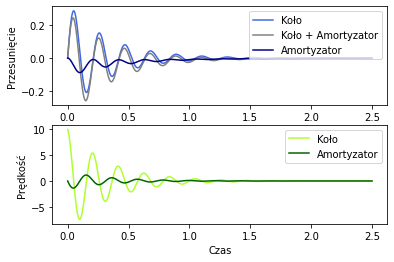

In [ ]:
gammaKoło, gammaAmor, omegaKoło, omegaAmor = 3,90,30,18
x0Koło,v0Koło,x0Amor,v0Amor = 0,10,0,0 #sqrt(2gh)

warPocz = [x0Koło, v0Koło, x0Amor, v0Amor]
tau = np.linspace(0,2.5,1000)

def fun(war, Tau, gammaKoło, gammaAmor, omegaKoło, omegaAmor):
    xKoło = war[1]
    vKoło = -2*gammaKoło*war[1]-omegaKoło**2*war[0]
    xAmor = war[3]
    vAmor = vKoło - 2*gammaAmor*war[3]-omegaAmor**2*war[2]
        
    return [xKoło, vKoło, xAmor, vAmor]

WAR = odeint(fun,warPocz,tau,args=(gammaKoło, gammaAmor, omegaKoło, omegaAmor))
plt.subplot(211)
plt.ylabel('Przesunięcie')
plt.xlabel('Czas')
plt.plot(tau,WAR[:,0],label='Koło',color='royalblue')
plt.plot(tau,WAR[:,2]+WAR[:,0],label='Koło + Amortyzator',color='grey')
plt.plot(tau,WAR[:,2],label='Amortyzator',color='darkblue')
plt.legend(loc = 'upper right')
plt.subplot(212)
plt.ylabel('Prędkość')
plt.xlabel('Czas')
plt.plot(tau,WAR[:,1],label='Koło',color='greenyellow')
plt.plot(tau,WAR[:,3],label='Amortyzator',color='darkgreen')
plt.legend()
plt.show()

Wstępna analiza numeryczna przedstawionych równań pokazuje, że dokładnie tak, jak się tego spodziewamy dołożenie dodatkowej amortyzacji zmniejsza maksymalne wychylenie jak i prędkość przesuwania się 'góry' układu (amortyzatora, czy siedzącego na nim człowieka) względem podłoża. Co można zauważyć na powyższych wykresach (współczynniki są losowe i&nbsp;nie przystają do rzeczywistości).

## Próba uproszczenia systemu

Częstokroć złożony układ da się zamienić na układ zastępczy z współczynnikami zastępczymi, tak jak się to dzieje dla złożonych układów elektrycznych. Niestety założone przez nas połączenie szeregowe koła z amortyzatorem sprawia, iż wszystkie standardowe podstawienia na współczynniki zastępcze zawodzą, co widać na poniższych wykresach.

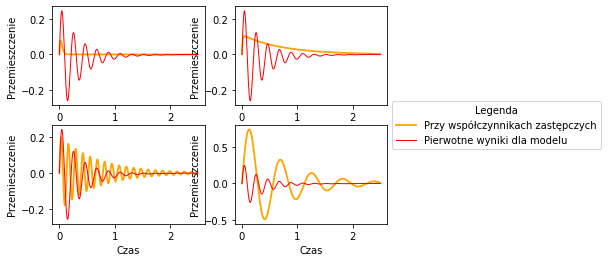

In [ ]:
def fun1(war, Tau, gamma,omega):
    x = war[1]
    v = -gamma*war[1]-omega**2*war[0]
    return [x, v]

def fun1Solves(numb,war,tau,arg):
    WAR1 = odeint(fun1,war,tau,args=arg)
    plt.subplot(numb)
    plt.xlabel('Czas')
    plt.ylabel('Przemieszczenie')
    plt.plot(tau,WAR1[:,0],label='Przy współczynnikach zastępczych',linewidth=1.8,color='orange')
    plt.plot(tau,WAR[:,2]+WAR[:,0], label='Pierwotne wyniki dla modelu',linewidth=1,color='red')

warPocz1 = [x0Amor, v0Koło]

a = (gammaKoło+gammaAmor,omegaKoło+omegaAmor)
b = (gammaKoło+gammaAmor,omegaKoło*omegaAmor/(omegaKoło+omegaAmor))
c = (gammaKoło*gammaAmor/(gammaKoło+gammaAmor), omegaKoło+omegaAmor)
d = (gammaKoło*gammaAmor/(gammaKoło+gammaAmor),omegaKoło*omegaAmor/(omegaKoło+omegaAmor))

fun1Solves(221,warPocz1,tau,a)
fun1Solves(222,warPocz1,tau,b)
fun1Solves(223,warPocz1,tau,c)
fun1Solves(224,warPocz1,tau,d)
plt.legend(loc='center left', bbox_to_anchor=(1, 1),title='Legenda')
plt.show()

## Wpływ poszczególnych współczynników na zachowanie układu

W celu przygotowania do pomiarów i implementacji danych rzeczywistych sprawdzona zostaje reakcja modelu na zmiany parametrów. Poniżej przedstawione są wykresy wpływu współczynników $\Gamma$ i $\omega$ na prędkość górnej części układu.

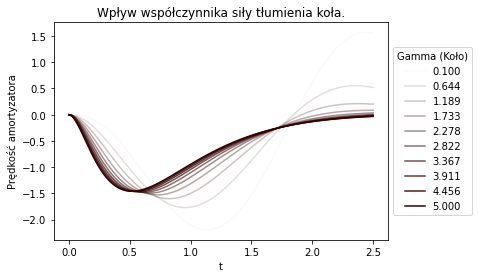

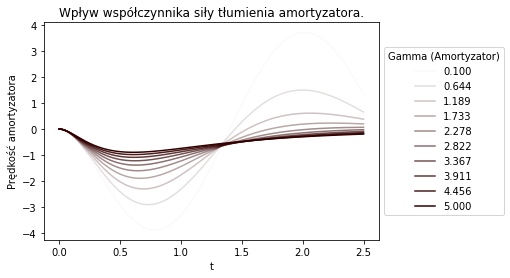

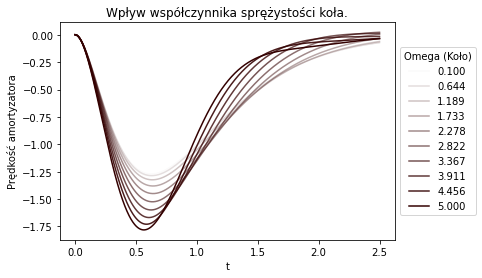

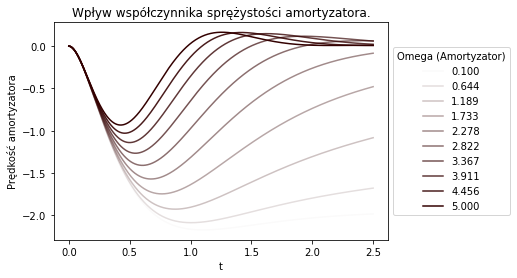

In [ ]:
gKMin, gKMax = 0.1,5
gAMin, gAMax = 0.1,5
oKMin, oKMax = 0.1,5
oAMin, oAMax = 0.1,5

for gK in np.linspace(gKMin,gKMax,10):
    arg = (gK, (gAMin+gAMax)/2, (oKMin+oKMax)/2, (oAMin+oAMax)/2)
    WAR2 = odeint(fun,warPocz,tau,args=arg)
    col, lab = (0.2,0,0,gK/gKMax), '%.3f'%gK
    
    plt.plot(tau,WAR2[:,2],label=lab,color=col)
    plt.xlabel('t')
    plt.ylabel('Prędkość amortyzatora')
    plt.title('Wpływ współczynnika siły tłumienia koła.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Gamma (Koło)')
plt.show()
    
for gA in np.linspace(gAMin,gAMax,10):
    arg = ((gKMin+gKMax)/2, gA, (oKMin+oKMax)/2, (oAMin+oAMax)/2)
    WAR2 = odeint(fun,warPocz,tau,args=arg)
    col, lab = (0.2,0,0,gA/gAMax), '%.3f'%gA
    
    plt.plot(tau,WAR2[:,2],label=lab,color=col)
    plt.xlabel('t')
    plt.ylabel('Prędkość amortyzatora')
    plt.title('Wpływ współczynnika siły tłumienia amortyzatora.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Gamma (Amortyzator)')
plt.show()

for oK in np.linspace(oKMin,oKMax,10):
    arg = ((gKMin+gKMax)/2, (gAMin+gAMax)/2, oK, (oAMin+oAMax)/2)
    WAR2 = odeint(fun,warPocz,tau,args=arg)
    col, lab = (0.2,0,0,oK/oKMax), '%.3f'%oK
    
    plt.plot(tau,WAR2[:,2],label=lab,color=col)
    plt.xlabel('t')
    plt.ylabel('Prędkość amortyzatora')
    plt.title('Wpływ współczynnika sprężystości koła.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Omega (Koło)')
plt.show()

for oA in np.linspace(oAMin,oAMax,10):
    arg = ((gKMin+gKMax)/2, (gAMin+gAMax)/2, (oKMin+oKMax)/2, oA)
    WAR2 = odeint(fun,warPocz,tau,args=arg)
    col, lab = (0.2,0,0,oA/oAMax), '%.3f'%oA
    
    plt.plot(tau,WAR2[:,2],label=lab,color=col)
    plt.xlabel('t')
    plt.ylabel('Prędkość amortyzatora')
    plt.title('Wpływ współczynnika sprężystości amortyzatora.')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='Omega (Amortyzator)')
plt.show()

Łatwo zauważyć, że największy wpływ na komfort jazdy przy pokonywaniu dużych przeszkód (większe ugięcia układu) będzie miał odpowiedni współczynnik tłumienia amortyzatora.

Powyższe rozwarzania tracą na znaczeniu, gdy opona jest napompowana do wysokiego ciśnienia i wpływ jej sprężystości na zachowanie układu jest pomijalny. Możemy wtedy przyjąć, że&nbsp;układ jest dobrze opisany pojedynczym równaniem oscylatora z tłumieniem bez siły wymuszającej. Zachowanie układu dobrze obrazują poniższe portrety fazowe (1,2,3,4 odpowiednio z brakiem tłumienia, z tłumieniem mniejszym, równym i większym od prędkości kątowej).

## Pola wektorowe

W celu lepszego zrozumienia analizowanego problemu oraz rozwiązań analitycznych, przedstawione zostaną portrety fazowe. 

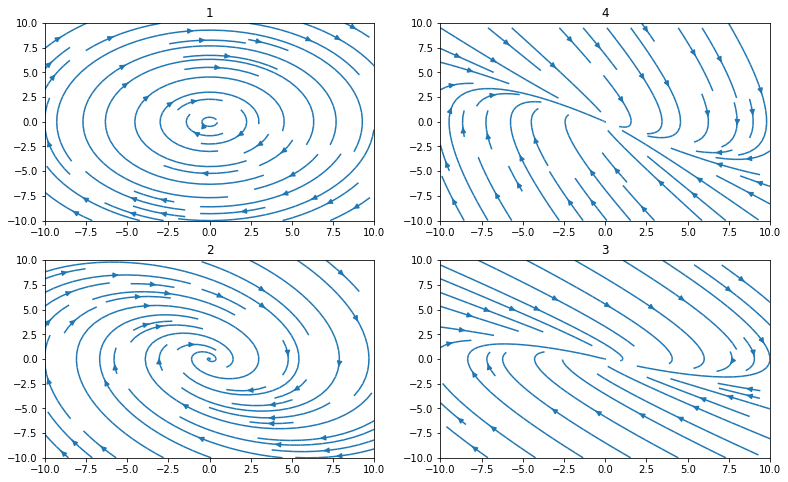

In [ ]:
LL = [0, 0.3, 1/2, 1.05]
WW = [1, 1, 1/2, 1]

w = 10
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

ct = 0
ct1 = 0
ct2 = 1

fig = plt.figure(figsize = (13, 8))
gs = gridspec.GridSpec(nrows = 2, ncols=2, height_ratios=[1, 1])

for L, W in zip(LL, WW):

    U = Y
    V = -2*L*Y - (W**2)*X

    speed = np.sqrt(U**2 + V**2)
    ax0 = fig.add_subplot(gs[ct, ct1])
    ax0.streamplot(X, Y, U, V, density=[0.5, 1])
    ax0.set_title(ct2)
    ct2 += 1

    if ct >= 1:
        if ct1 < 1:
            ct1 += 1 

        else:
            ct = 0
            ct1 = 1
    else:
        ct += 1

plt.show()

Powyższym portretom fazowym odpowiadają poniższe rozwiązania analityczne [3], [6]:

_(7)_ $x(t) = C_{1}e^{i\omega_{0}t} + C_{2}e^{-i \omega_{0}t}$, - brak tłumienia, rys. 1;

_(8)_ $x(t) = e^{- \Gamma t}(C_{1}e^{it\sqrt{\omega_{0}^{2}-\Gamma^{2}}} + C_{2}e^{-it\sqrt{\omega_{0}^{2}-\Gamma^{2}}})$, - słabe tłumienie, rys. 2;

_(9)_ $x(t) = C_{1}e^{- \Gamma t} + C_{2}te^{-\Gamma t}$, - tłumienie krytyczne, rys. 3;

_(10)_ $x(t) = C_{1}e^{-(\Gamma-\sqrt{\Gamma^{2}-\omega_{0}^{2}})t} + C_{2}te^{-(\Gamma+\sqrt{\Gamma^{2}-\omega_{0}^{2}})t}$, - silne tłumienie, rys. 4. 

## Wyniki eksperymentalne

Podczas analizy eksperymentalnej zjawiska użyty został rower o następujących parametrach: 
1. ramie rozmiaru 17",
2. rozstawie osi 1.1m,
3. masie 11kg,
4. średnicy kół 29".

W rowerze zamontowany jest amortyzator powietrzny RockShox Recon Gold TK Solo Air o skoku 100mm. Masa zalanego olejami amortyzatora wynosi około 1.9kg. Dla uproszczenia rachunków przyjęte zostaje, że masa nieamortyzowana wynosi dokładnie 2kg (masa koła przedniego plus część masy amortyzatora).

Opona założona na przednie koło to Specialized Fast Track 2.1 cala. Montaż jest bezdętkowy.

W przeciwieństwie do poprzednich analiz, tu działamy na amortyzator siłą od góry, co spotykamy gdy rower spada z wysokości np. pod koniec wykonywanego skoku. Nie jest to duża różnica, gdyż zmienia się jedynie kierunek ruchu, jednak warto mieć to na uwadze.

Wszystkie pomiary przemieszczeń zostały wykonane za pomocą programu analizy video Tracker [7]. Należy pamiętać, że jest to metoda posiadająca ograniczenia związane głównie z parametrami kamery.

Ponadto wszelkie rozbieżności prostych modeli teoretycznych z danymi związanymi z badanym amortyzatorem mogą wynikać z komplikacji jego budowy. Dobrym przykładem jest sama budowa tłumika (fot. poniżej) w widelcu RockShox Recon Gold TK Solo Air. Jest on w dużej mierze ciałem sprężystym, co ma na celu tłumienie małych drgań, podczas gdy sam amortyzator jest zablokowany (utwardzony).

![](https://drive.google.com/file/d/1BXqKXcV3weY1JCtCHg9k3I1LczQCBxxD/view?usp=sharing)

### Pomiar współczynnika sprężystości amortyzatora

<div style="text-align: left"> Na zdjęciu przedstawione jest stanowisko pomiarowe pozwalające na przybliżone zmierzenie współczynnika sprężystości amortyzatora. Ugięcie było powodowane przez masę kolarza. Ciśnienie w komorze powietrznej wynosiło 110 psi.</div> <img src="K.jpg" alt="Drawing" style="width: 300px;" align="center"/>

Zakładamy, że można przybliżyć sprężynę powietrzną sprężyną o liniowej charakterystyce i wyznaczamy współczynnik sprężystości k za pomocą prawa Hooke'a

\begin{equation}
    k = \frac{m\cdot g}{x}.
\end{equation}

Uśredniona wartość współczynnika sprężystości amortyzatora k wynosi przy takim założeniu około $17 \frac{kN}{m}$. Obciążenie wskazane przez wagę wynosiło średnio 54kg. Korzystając z wyliczonych danych możemy wyznaczyć wartość współczynnika $\omega$. Wynosi ona w tym przypadku $\sqrt{\frac{17000}{54}} \approx 17.74$.

### Pomiar współczynnika sprężystości opony

Używając podobnego stanowiska pomiarowego możliwe jest zmierzenie współczynnika sprężystości opony. Dla przeglądowości wyników zostały wykonane trzy pomiary, z użyciem opony napompowanej do ciśnienia 2 bar, 1.6 bar i 0.5 bar. Ze względu na poglądowy charakter badań praktycznych wyniki zostały zaokrąglone do wartości całkowitych.

<table style="width:80%">
  <tr>
    <th>masa obciążenia [kg]</th>
    <th>ugięcie opony [cm]</th> 
    <th>ciśnienie [bar]</th>
    <th>współczynnik sprężystości $\left[ \frac{N}{m} \right]$</th>
  </tr>
  <tr>
    <td>48.7</td>
    <td>0.69</td>
    <td>2.0</td>
    <td>69 238</td>
  </tr>
  <tr>
    <td>45.3</td>
    <td>1.02</td>
    <td>1.6</td>
    <td>43 567</td>
  </tr>
  <tr>
    <td>40.1</td>
    <td>1.08</td>
    <td>0.5</td>
     <td>36 424</td>
  </tr>
</table>

Zgodnie z wcześniejszymi przewidywaniami twardość opony maleje wraz ze spadkiem ciśnienia. Dużą różnicę pomiędzy wartością twardości dla 2.0 bar a 1.6 bar i małą różnicę dla 1.6 i 0.5 bar można tłumaczyć dużym wpływem twardości samej, nienapompowanej opony na ugięcie przy niskich ciśnieniach. Warto nadmienić, że producent przystsowuje oponę do pracy w ciśnieniach od 1.6 bara wzwyż. Z danych w tabeli możemy odczytać faktyczną przyczynę braku celowości dalszego obniżania ciśnienia. Spadek twardości wynosi zaledwie 16% przy dramatycznym wzroście ryzyka uszkodzenia opony i koła. 


Ze względu na łatwe do zmierzenia w programie Tracker ugięcie opony przy ciśnieniu 0.5 bar właśnie ten wynik poddamy analizie i wyznaczymy współczynnik $\omega$. W tym przypadku ma on wartość $\sqrt{\frac{36424}{40.1}} \approx 30.14$.

### Pomiar współczynnika tłumienia opony

W oscylatorze przybliżającym oponę można spodziewać się bardzo małego współczynnika tłumienia ze względu na brak elementów konstrukcyjnych służących wytłumianiu drgań. W celu sprawdzenia poprawności takiego wnioskowania opracowany został prosty pomiar zmiany amplitudy drgań koła puszczonego swobodnie z pewnej wysokości. Ważne jest tutaj założenie, że zmiana amplitudy (wysokości odbicia) jest proporcjonalna do współczynnika tłumienia opony (obraz przeanalizowano w programie Tracker, by pokazać więcej mówiące wykresy).

Analiza powyższych wykresów pozwala na wniosek, że małe zmiany ciśnienia (w zakresie, który jest dopuszczalny lub zalecany dla danej masy kolarza) nie wpływają znacząco na współczynnik tłumienia. Obliczając ilorazy wysokości pierwszego odbicia do wysokości początkowej otrzymujemy wartości 0.16 dla 2 bar, 0.17 dla 1.6 bara i 0.20 dla 0.5 bara. Pozwala to na wniosek, że zmiana wysokości jest spowodowana czynnikami niezależnymi od ciśnienia opony w jej zakresie pracy (np. opór powietrza, tłumienie podłoża). Wynik dla opony szosowej, 0.24 dla 4 bar, może różnić się znacząco z powodu innego miejsca wykonania badań lub innej charakterystyki samego koła (które, warto zauważyć, w rowerze szosowym jest poza rękami kolarza jedyną amortyzacją). 

### Pomiar współczynnika tłumienia amortyzatora

Do pomiaru współczynnika tłumienia wykorzystano stanowisko analogiczne do  stanowiska mierzącego sprężystość. Wykorzystując metody numeryczne staramy się przybliżyć dane eksperymentalne za pomocą prezentowanego modelu.

W poniższym skrypcie używamy metody Rungego-Kutty czwartego rzędu dla układów równań pierwszego rzędu aby zamodelować układ opona-amortyzator.

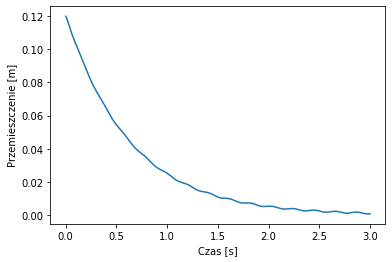

In [ ]:
import matplotlib.pyplot as plt

gamma1 = 0        # współczynnik gamma tłumienia dla opony - pomijalny
omega1 = 30.14
gamma2 = 100      # arbitralnie wybrany współczynnik tłumienia amortyzatora
omega2 = 17.74

def dx1dt(t, x1, x2, y1, y2): 
    return y1

def dy1dt(t, x1, x2, y1, y2):
    return - 2*gamma1*y1 - omega1**2*x1

def dx2dt(t, x1, x2, y1, y2): 
    return y2

def dy2dt(t, x1, x2, y1, y2):
    return - 2*gamma2*y2 - omega2**2*x2 - 2*gamma1*y1 - omega1**2*x1

# Finds value of y for a given t using step size h 
# and initial value y0 at t0. 
def rungeKutta(x10, x20, y10, y20, t, h, t0): 
    # Count number of iterations using step size or step height h 
    n = (int)((t - t0)/h) 

# Iterate for number of iterations 
    for i in range(1, n + 1): 
        k1 = h * dx1dt(t0, x10, x20, y10, y20) 
        l1 = h * dy1dt(t0, x10, x20, y10, y20)
        m1 = h * dy2dt(t0, x10, x20, y10, y20)
        n1 = h * dx2dt(t0, x10, x20, y10, y20)

        k2 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        l2 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)
        m2 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        n2 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)

        k3 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)
        l3 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        m3 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        n3 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)

        k4 = h * dx1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        l4 = h * dy1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3) 
        m4 = h * dy2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        n4 = h * dx2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
  
        # Update next value of x1, x2, y1 and y2
        x10 = x10 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
        x20 = x20 + (1.0 / 6.0)*(n1 + 2 * n2 + 2 * n3 + n4)
        y10 = y10 + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4) 
        y20 = y20 + (1.0 / 6.0)*(m1 + 2 * m2 + 2 * m3 + m4) 
  
        # Update next value of t
        t0 = t0 + h 
    return x20

# Driver method, warunki początkowe
t0 = 0       # czas
x10 = 0.003  # położenie opony
y10 = 0      # prędkość opony
x20 = 0.12   # położenie amortyzatora
y20 = 0      # prędkości amortyzatora
t = 0        # czas do wykonania wykresu
h = 0.001    # krok czasowy

Y = []
T = []

while t <= 3:
    T.append(t)
    Y.append(rungeKutta(x10, x20, y10, y20, t, h, t0))
    t += 0.01

plt.plot(T, Y)
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [m]')
plt.show()

Powyższy wykres przedstawia numeryczne wyniki modelu (równania 3-6), ze współczynnikami sprężystości wyznaczonymi eksperymentalnie (za wyjątkiem współczynnika tłumienia amortyzatora, który wybraliśmy arbitralnie).

W celu przybliżonego wyznaczenia współczynnika tłumienia opracowany został poniższy kod. Rozwiązuje on numerycznie równania 3-6 dla współczynników $\omega_{am} = 18.3$ i $\omega_{op} = 27$ wynikających ze zmiany masy działającej na układ względem tej w przykładowym rozwiązaniu.

Należy nadmienić iż jak widać na powyższym obrazie eksperymentator działa na rower (tym samym amortyzator i koło) ciągłą siłą wymuszającą zależną od czasu. Odrzucono początkowy fragment danych, gdzie działająca siła jest stosunkowo niewielka i przeanalizowano dalszą część danych, dla których można było uznać, że działająca siła miała charakter chwilowy i zanikła po chwili uznanej za początkową. 

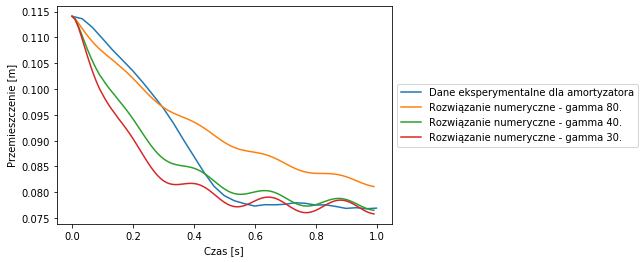

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Finds value of y for a given t using step size h 
# and initial value y0 at t0. 
def rungeKutta(x10, x20, y10, y20, t, h, t0, gamma=80): 
    gamma1 = 0     # 1 - opona, 2 - amortyzator
    omega1 = 27    # 30.14
    gamma2 = gamma
    omega2 = 18.3 #17.74
    
    def dx1dt(t, x1, x2, y1, y2): 
        return y1

    def dy1dt(t, x1, x2, y1, y2):
        return - 2*gamma1*y1 - omega1**2*x1

    def dx2dt(t, x1, x2, y1, y2): 
        return y2

    def dy2dt(t, x1, x2, y1, y2):
        return - 2*gamma2*y2 - omega2**2*x2 - 2*gamma1*y1 - omega1**2*x1
        
    # Count number of iterations using step size or step height h 
    n = (int)((t - t0)/h)  
    # Iterate for number of iterations 
    for i in range(1, n + 1): 
        k1 = h * dx1dt(t0, x10, x20, y10, y20) 
        l1 = h * dy1dt(t0, x10, x20, y10, y20)
        m1 = h * dy2dt(t0, x10, x20, y10, y20)
        n1 = h * dx2dt(t0, x10, x20, y10, y20)

        k2 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        l2 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)
        m2 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        n2 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)

        k3 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)
        l3 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        m3 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        n3 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)

        k4 = h * dx1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        l4 = h * dy1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3) 
        m4 = h * dy2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        n4 = h * dx2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)

        # Update next value of x1, x2, y1 and y2
        x10 = x10 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
        x20 = x20 + (1.0 / 6.0)*(n1 + 2 * n2 + 2 * n3 + n4)
        y10 = y10 + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4) 
        y20 = y20 + (1.0 / 6.0)*(m1 + 2 * m2 + 2 * m3 + m4) 

        # Update next value of t
        t0 = t0 + h 
    return x20


#  tablica czasów z danych eksperymentalnych (amortyzator)
T = [0.0,0.03326666666666688,0.06653333333333285,0.09981111111111113,0.13307777777777755,0.166344444444444,
0.19962222222222226,0.23288888888888867,0.266166666666667,0.2994333333333325,0.33269999999999983,0.3659777777777781,
0.3992444444444445,0.43251111111111096,0.4657888888888883,0.49905555555555564,0.532322222222222,0.5655888888888885,
0.5988666666666668,0.6321444444444442,0.6654111111111106,0.698677777777778,0.7319555555555552,0.7652222222222226,
0.798511111111111,0.8317666666666664,0.8650222222222228,0.8982999999999993,0.9315777777777775,0.9648555555555549,
0.9981111111111113,1.0313888888888887,1.064666666666666,1.0979333333333334,1.1311999999999998,1.1644777777777782,
1.1977444444444436,1.2310222222222218,1.2642777777777783,1.2975555555555547,1.330833333333333,1.3640999999999994,
1.3973666666666669,1.430644444444445,1.4638999999999995,1.497177777777778,1.5304555555555552,1.5637222222222218,
1.596988888888889,1.6302555555555556,1.6635444444444447,1.6967999999999992,1.7300777777777776,1.7633444444444448,
1.7966111111111105,1.8298888888888887,1.863155555555555,1.8964222222222225,1.9296999999999997,1.9629666666666663,
1.9962333333333335]

# tablica przemieszczeń dla danych eksperymentalnych (amortyzator)
Y = [0.12388303329800876,0.12347617647260384,0.1235073131493436,0.12381971993063534,0.12341286310523047,
0.12286000844577738,0.12318314079061365,0.12311014187358954,0.1229845551527366,0.1229845551527366,0.12304682850621618,
0.12309837629615122,0.12285896843188365,0.12249397384676314,0.12253583608704743,0.12253583608704743,0.12215043038873158,
0.12164047798345656,0.12136993344244917,0.12145365792301788,0.12097484219448262,0.12066243541319088,0.11993348625684358,
0.11951694388178791,0.1190166770261637,0.11880840583863589,0.11846486238060439,0.11763177763049315,0.11669455728661804,
0.11554906575521506,0.11411157855571569,0.11362307727752968,0.1119676333408518,0.10978182588570351,0.10756488175381551,
0.10555620880945527,0.1035163991883552,0.10123718170298757,0.09880124082002723,0.09629230102004277,0.09336577883110886,
0.09012580984698959,0.08700174203407252,0.08387975424894278,0.08115493773956733,0.07935661601052246,0.07836024235484895,
0.07779113663777565,0.07733585206411703,0.0775977510693674,0.07756765440652136,0.07768251556382977,0.07797451123192622,
0.07785965007461781,0.07752579216623706,0.07756661439262758,0.07725316759744211,0.07687744744877711,0.07701271971928075,
0.07680340851785916,0.07692691521092465]

# tablica czasów dla danych eksperymentalnych (opona)
TT = [0.0,0.03326666666666688,0.06653333333333285,0.09981111111111113,0.13307777777777755,0.166344444444444,
0.19962222222222226,0.23288888888888867,0.266166666666667,0.2994333333333325,0.33269999999999983,0.3659777777777781,
0.3992444444444445,0.43251111111111096,0.4657888888888883,0.49905555555555564,0.532322222222222,0.5655888888888885,
0.5988666666666668,0.6321444444444442,0.6654111111111106,0.698677777777778,0.7319555555555552,0.7652222222222226,
0.798511111111111,0.8317666666666664,0.8650222222222228,0.8982999999999993,0.9315777777777775,0.9648555555555549,
0.9981111111111113,1.0313888888888887,1.064666666666666,1.0979333333333334,1.1311999999999998,1.1644777777777782,
1.1977444444444436,1.2310222222222218,1.2642777777777783,1.2975555555555547,1.330833333333333,1.3640999999999994,
1.3973666666666669,1.430644444444445,1.4638999999999995,1.497177777777778,1.5304555555555552,1.5637222222222218,
1.596988888888889,1.6302555555555556,1.6635444444444447,1.6967999999999992,1.7300777777777776,1.7633444444444448,
1.7966111111111105,1.8298888888888887,1.863155555555555,1.8964222222222225,1.9296999999999997,1.9629666666666663,
1.9962333333333335]

# tablica przemieszczeń dla danych eksperymentalnych (opona) 
YY = [0.003336401328759342,0.0034405369225233295,0.0034813591489138984,0.003710041449636936,0.00353290693884889,
0.003438456894735764,0.0033654579777115945,0.0033654579777115945,0.00338586909090699,0.0033440068506226384,
0.003229145693314228,0.0032184201297696946,0.0028845622213889976,0.003030560055437226,0.0025517443269018614,
0.0022178864185211644,0.0022490230952609824,0.0020933397115620034,0.0014685261489786328,0.0013235683288241873,
0.0010326126746215136,6.364814127610696E-4,2.239341372223258E-5,-4.048745248779184E-4,-8.010057867382514E-4,
-8.944158169577054E-4,-0.0014462304625170175,-0.00219559073205966,-0.0021225918150354905,-0.003372218940202343,
-0.0037157623982337906,-0.004162401436135443,-0.0055462608179123185,-0.0067529856889010365,-0.007636578215053591,
-0.009031163160375,-0.010466570332086755,-0.011401710648174412,-0.01287898006017063,-0.013596163639079673,
-0.014314387231882497,-0.015438427636196406,-0.0166344269436407,-0.017652251726403168,-0.019023305516847944,
-0.019727683504424998,-0.0209226427979754,-0.021011892772619722,-0.02138345286570975,-0.021746367423042923,
-0.02124506055352482,-0.02120319831324058,-0.02055693362356803,-0.020943379335777612,-0.02089183154584262,
-0.020673874808664006,-0.021195592791377282,-0.021330865061880977,-0.02145645178273392,-0.021342630639319293,
-0.021270671736188906]

plt.plot(list(map(lambda x: x-T[30],T[30:])), Y[30:], label='Dane eksperymentalne dla amortyzatora')

# Driver method, warunki początkowe
t0 = 0       # czas
x10 = 0.003  # położenie opony
y10 = 0      # prędkość opony
x20 = 0.037111   # położenie amortyzatora (przeskalowane)
y20 = 0      # prędkości amortyzatora
t = 0        # czas do wykonania wykresu
h = 0.001    # krok czasowy

Y = []
T = []
while t<=1:
    T.append(t)
    Y.append(rungeKutta(x10, x20, y10, y20, t, h, t0))
    t += 0.01
solves = list(map(lambda x: x+0.077, Y)) # # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T, solves, label='Rozwiązanie numeryczne - gamma 80. ')

Y40 = []
T40=[]
t=0
while t<=1:
    T40.append(t)
    Y40.append(rungeKutta(x10, x20, y10, y20, t, h, t0, gamma=40))
    t += 0.01
solves40 = list(map(lambda x: x+0.077, Y40)) # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T40, solves40, label='Rozwiązanie numeryczne - gamma 40. ')

Y30 = []
T30=[]
t=0
while t<=1:
    T30.append(t)
    Y30.append(rungeKutta(x10, x20, y10, y20, t, h, t0,gamma=30))
    t += 0.01
solves30 = list(map(lambda x: x+0.077, Y30)) # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T30, solves30, label='Rozwiązanie numeryczne - gamma 30. ')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [m]')
plt.show()

Analiza powyższego wykresu pozwala zauważyć, że nie jest możliwe dokładne dopasowanie rozwiązania numerycznego modelu (równania 3-6) do wyników eksperymentalnych. Z tego względu przeprowadzony został kolejny eksperyment numeryczny, tym razem z wykorzystaniem modelu ćwiartkowego pojazdu z tłumikiem hydraulicznym [4].

Zgodnie z formą modelu proponowaną w [4] :

_(11)_ $ \frac{d^{2}x_{am}}{dt^2}=-2\Gamma_{am}(\frac{dx_{am}}{dt}-\frac{dx_{op}}{dt})-\omega^{2}_{op}(x_{am}-x_{op}) $,

_(12)_ $ \frac{d^{2}x_{op}}{dt^2}= - \frac{1}{m_{u}}\frac{d^{2}x_{am}}{dt^2} + 2\Gamma_{op}(\frac{dx_{am}}{dt}-\frac{dx_{op}}{dt})+\omega^{2}_{op}(x_{am}-x_{op})$.

Współczynniki $ b $ i $ k $ tak jak wcześciej prowadzą do $\Gamma$ i $\omega$. Zmienną $ m_{u}$ oznaczamy masę koła i dolnych goleni amortyzatora. Warto zauważyć, że powyższy model daje możliwość analizy bardziej skomplikowanych przejazdów przez przeszkody dzięki zmiennej $z$, co może być przedmiotem dalszych badań układu. Poniżej przedstawiony jest kod, który dokonuje obliczeń numerycznych z wykorzystaniem modelu ćwiartkowego.

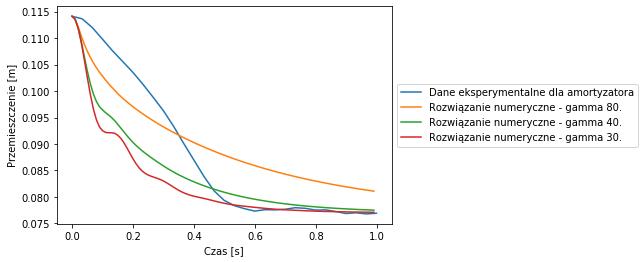

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def rungeKutta(x10, x20, y10, y20, t, h, t0, gamma = 80): 
    gamma1 = 0
    omega1 = 30.14
    gamma2 = gamma
    omega2 = 17.74
    
    def dx1dt(t, x1, x2, y1, y2): 
        return y1

    def dy1dt(t, x1, x2, y1, y2):
        return - 2*gamma1*(y1) - omega1**2*(x1) - (1/2)*2*gamma2*y2 - omega2**2*x2

    def dx2dt(t, x1, x2, y1, y2): 
        return y2

    def dy2dt(t, x1, x2, y1, y2):
        return - 2*gamma2*(y2 - y1) - omega2**2*(x2 - x1)

    n = (int)((t - t0)/h)  

    for i in range(1, n + 1): 

        k1 = h * dx1dt(t0, x10, x20, y10, y20) 
        l1 = h * dy1dt(t0, x10, x20, y10, y20)
        m1 = h * dy2dt(t0, x10, x20, y10, y20)
        n1 = h * dx2dt(t0, x10, x20, y10, y20)

        k2 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        l2 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)
        m2 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1) 
        n2 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k1, x20 + 0.5*n1, y10 + 0.5*l1, y20 + 0.5*m1)

        k3 = h * dx1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)
        l3 = h * dy1dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        m3 = h * dy2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2) 
        n3 = h * dx2dt(t0 + 0.5 * h, x10 + 0.5 * k2, x20 + 0.5*n2, y10 + 0.5*l2, y20 + 0.5*m2)

        k4 = h * dx1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        l4 = h * dy1dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3) 
        m4 = h * dy2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)
        n4 = h * dx2dt(t0 + h, x10 + k3, x20 + n3, y10 + l3, y20 + m3)

        # Update next value of x1, x2, y1 and y2
        x10 = x10 + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
        x20 = x20 + (1.0 / 6.0)*(n1 + 2 * n2 + 2 * n3 + n4)
        y10 = y10 + (1.0 / 6.0)*(l1 + 2 * l2 + 2 * l3 + l4) 
        y20 = y20 + (1.0 / 6.0)*(m1 + 2 * m2 + 2 * m3 + m4) 


        # Update next value of t
        t0 = t0 + h 
    return x20

#  tablica czasów z danych eksperymentalnych (amortyzator)
T = [0.0,0.03326666666666688,0.06653333333333285,0.09981111111111113,0.13307777777777755,0.166344444444444,
0.19962222222222226,0.23288888888888867,0.266166666666667,0.2994333333333325,0.33269999999999983,0.3659777777777781,
0.3992444444444445,0.43251111111111096,0.4657888888888883,0.49905555555555564,0.532322222222222,0.5655888888888885,
0.5988666666666668,0.6321444444444442,0.6654111111111106,0.698677777777778,0.7319555555555552,0.7652222222222226,
0.798511111111111,0.8317666666666664,0.8650222222222228,0.8982999999999993,0.9315777777777775,0.9648555555555549,
0.9981111111111113,1.0313888888888887,1.064666666666666,1.0979333333333334,1.1311999999999998,1.1644777777777782,
1.1977444444444436,1.2310222222222218,1.2642777777777783,1.2975555555555547,1.330833333333333,1.3640999999999994,
1.3973666666666669,1.430644444444445,1.4638999999999995,1.497177777777778,1.5304555555555552,1.5637222222222218,
1.596988888888889,1.6302555555555556,1.6635444444444447,1.6967999999999992,1.7300777777777776,1.7633444444444448,
1.7966111111111105,1.8298888888888887,1.863155555555555,1.8964222222222225,1.9296999999999997,1.9629666666666663,
1.9962333333333335]

# tablica przemieszczeń dla danych eksperymentalnych (amortyzator)
Y = [0.12388303329800876,0.12347617647260384,0.1235073131493436,0.12381971993063534,0.12341286310523047,
0.12286000844577738,0.12318314079061365,0.12311014187358954,0.1229845551527366,0.1229845551527366,0.12304682850621618,
0.12309837629615122,0.12285896843188365,0.12249397384676314,0.12253583608704743,0.12253583608704743,0.12215043038873158,
0.12164047798345656,0.12136993344244917,0.12145365792301788,0.12097484219448262,0.12066243541319088,0.11993348625684358,
0.11951694388178791,0.1190166770261637,0.11880840583863589,0.11846486238060439,0.11763177763049315,0.11669455728661804,
0.11554906575521506,0.11411157855571569,0.11362307727752968,0.1119676333408518,0.10978182588570351,0.10756488175381551,
0.10555620880945527,0.1035163991883552,0.10123718170298757,0.09880124082002723,0.09629230102004277,0.09336577883110886,
0.09012580984698959,0.08700174203407252,0.08387975424894278,0.08115493773956733,0.07935661601052246,0.07836024235484895,
0.07779113663777565,0.07733585206411703,0.0775977510693674,0.07756765440652136,0.07768251556382977,0.07797451123192622,
0.07785965007461781,0.07752579216623706,0.07756661439262758,0.07725316759744211,0.07687744744877711,0.07701271971928075,
0.07680340851785916,0.07692691521092465]

# tablica czasów dla danych eksperymentalnych (opona)
TT = [0.0,0.03326666666666688,0.06653333333333285,0.09981111111111113,0.13307777777777755,0.166344444444444,
0.19962222222222226,0.23288888888888867,0.266166666666667,0.2994333333333325,0.33269999999999983,0.3659777777777781,
0.3992444444444445,0.43251111111111096,0.4657888888888883,0.49905555555555564,0.532322222222222,0.5655888888888885,
0.5988666666666668,0.6321444444444442,0.6654111111111106,0.698677777777778,0.7319555555555552,0.7652222222222226,
0.798511111111111,0.8317666666666664,0.8650222222222228,0.8982999999999993,0.9315777777777775,0.9648555555555549,
0.9981111111111113,1.0313888888888887,1.064666666666666,1.0979333333333334,1.1311999999999998,1.1644777777777782,
1.1977444444444436,1.2310222222222218,1.2642777777777783,1.2975555555555547,1.330833333333333,1.3640999999999994,
1.3973666666666669,1.430644444444445,1.4638999999999995,1.497177777777778,1.5304555555555552,1.5637222222222218,
1.596988888888889,1.6302555555555556,1.6635444444444447,1.6967999999999992,1.7300777777777776,1.7633444444444448,
1.7966111111111105,1.8298888888888887,1.863155555555555,1.8964222222222225,1.9296999999999997,1.9629666666666663,
1.9962333333333335]

# tablica przemieszczeń dla danych eksperymentalnych (opona) 
YY = [0.003336401328759342,0.0034405369225233295,0.0034813591489138984,0.003710041449636936,0.00353290693884889,
0.003438456894735764,0.0033654579777115945,0.0033654579777115945,0.00338586909090699,0.0033440068506226384,
0.003229145693314228,0.0032184201297696946,0.0028845622213889976,0.003030560055437226,0.0025517443269018614,
0.0022178864185211644,0.0022490230952609824,0.0020933397115620034,0.0014685261489786328,0.0013235683288241873,
0.0010326126746215136,6.364814127610696E-4,2.239341372223258E-5,-4.048745248779184E-4,-8.010057867382514E-4,
-8.944158169577054E-4,-0.0014462304625170175,-0.00219559073205966,-0.0021225918150354905,-0.003372218940202343,
-0.0037157623982337906,-0.004162401436135443,-0.0055462608179123185,-0.0067529856889010365,-0.007636578215053591,
-0.009031163160375,-0.010466570332086755,-0.011401710648174412,-0.01287898006017063,-0.013596163639079673,
-0.014314387231882497,-0.015438427636196406,-0.0166344269436407,-0.017652251726403168,-0.019023305516847944,
-0.019727683504424998,-0.0209226427979754,-0.021011892772619722,-0.02138345286570975,-0.021746367423042923,
-0.02124506055352482,-0.02120319831324058,-0.02055693362356803,-0.020943379335777612,-0.02089183154584262,
-0.020673874808664006,-0.021195592791377282,-0.021330865061880977,-0.02145645178273392,-0.021342630639319293,
-0.021270671736188906]

plt.plot(list(map(lambda x: x-T[30],T[30:])), Y[30:], label='Dane eksperymentalne dla amortyzatora')

# Driver method, warunki początkowe
t0 = 0       # czas
x10 = 0.003  # położenie opony
y10 = 0      # prędkość opony
x20 = 0.037111   # położenie amortyzatora (przeskalowane)
y20 = 0      # prędkości amortyzatora
t = 0        # czas do wykonania wykresu
h = 0.001    # krok czasowy

Y = []
T = []

#while t <= 1.9962333333333335:
while t<=1:
    T.append(t)
    Y.append(rungeKutta(x10, x20, y10, y20, t, h, t0))
    t += 0.01
solves = list(map(lambda x: x+0.077, Y)) # # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T, solves, label='Rozwiązanie numeryczne - gamma 80. ')

Y40 = []
T40=[]
t=0
while t<=1:
    T40.append(t)
    Y40.append(rungeKutta(x10, x20, y10, y20, t, h, t0, gamma=40))
    t += 0.01
solves40 = list(map(lambda x: x+0.077, Y40)) # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T40, solves40, label='Rozwiązanie numeryczne - gamma 40. ')

Y30 = []
T30=[]
t=0
while t<=1:
    T30.append(t)
    Y30.append(rungeKutta(x10, x20, y10, y20, t, h, t0,gamma=30))
    t += 0.01
solves30 = list(map(lambda x: x+0.077, Y30)) # punkt równowagi amortyzatora jest ustawiony na wys. ok. 0.077m
plt.plot(T30, solves30, label='Rozwiązanie numeryczne - gamma 30. ')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [m]')
plt.show()

Warto zauważyć, że w przypadku tego modelu nie występuje właściwie nieporządane i niezgodne z danymi eksperymentalnymi drganie układu w końcowej fazie ruchu. Nadal jednak nie jest on wystarczająco dokładnym przybliżeniem realnej pracy układu i nie daje możliwości jednoznacznego wyznaczenia współczynnika tłumienia.

## Wnioski końcowe

Przy pomocy prostego rozumowania oraz programu do analizy video Tracker [7] udało się pozyskać podstawowe informacje na temat badanego układu opona - amortyzator. Niedoskonałości pierwotnego modelu wsparte zostały przez bardziej rozbudowany model ćwiartkowy amortyzacji pojazdu. Nie pozwoliło to jednak na wyznaczenie współczynnika tłumienia amortyzatora.

W celu dalszego badania powyższego układu należałoby przede wszystkim wziąć pod uwagę nieliniowe współczynniki amortyzatora powietrznego [5] oraz ponownie wykonać eksperyment mierzący wartości obserwowane w badanym rowerze. 

## Bibliografia
<br>[1] Gerald A. Smith, <i>"AN ABSTRACT OF THE DISSERTATION OF Morris Levy for the degree of Doctor of Philosophy in Human Performance presented on May 8, 2000. Title: Kinetic and Vibration Analysis of Off-Road Bicycle Suspension Systems" </i>;
<br>[2] The Open University, <i>"MST224 Mathematical methods Second-order differential equations"</i>;
<br>[3] Yousef Daneshbod and Joe Latulippe, <i>"A look at damped harmonic oscillators through the phase plane"</i>, Teaching Mathematics and Its Applications (2011) 30, 62-69;
<br>[4] Ervin Alvarez-Sánchez, <i>"A quarter-car suspension system: car body mass estimator and sliding mode control"</i>, Procedia Technology 7 ( 2013 ) 208 – 214;
<br>[5] Hengjia Zhu and James Yang and Yunqing Zhang and Xingxing Feng and Zeyu Ma, <i>"Nonlinear dynamic model of air spring with a damper for vehicle ride comfort"</i>, Nonlinear Dyn (2017) 89:1545–1568;
<br>[6] John R. Taylor, <i>"Mechanika klasyczna tom 1"</i>, Warszawa 2006, PWN;
<br>[7] Animacje danych eksperymentalnych wykonane przy pomocy oprogramowania Traker 5.1.3'
D. Brown, Computer Program TRACKER VIDEO ANALYSIS AND MODELING TOOL, Version 5.1.3 (2020), WWW Document, (http://physlets.org/tracker/).